# Compare Document Similarity Algorithms with Reurters-21578 Dataset

First download the Reuters-21578 dataset in JSON format into the local folder:

```bash
git clone https://github.com/fergiemcdowall/reuters-21578-json
```

The first step will be to convert this into the default corpus format we use:


In [9]:
%matplotlib inline

import json
import codecs 
import os
import time

docs = []
for filename in os.listdir("reuters-21578-json/data/full"):
    f = open("reuters-21578-json/data/full/"+filename)
    js = json.load(f)
    for j in js:
        if 'topics' in j and 'body' in j:
            d = {}
            d["id"] = j['id']
            d["text"] = j['body'].replace("\n","")
            d["title"] = j['title']
            d["tags"] = ",".join(j['topics'])
            docs.append(d)
print "loaded ",len(docs)," documents"

loaded  10377  documents


In [2]:
from  seldon.text import DocumentSimilarity,DefaultJsonCorpus

corpus = DefaultJsonCorpus(docs)
ds = DocumentSimilarity()

## Create scoring method

We create a score method to run over a range of vector sizes and track the accuracy and the training time. The accuracy will be the jaccard similarity of the query vector tags to the nearest neighour tags averaged over all documents. This uses the tags as a proxy for evaluating good matches. Finally we show a graph of the results.

In [10]:
def score(ds,model_type):
    scores = []
    times = []
    vec_sizes = [10,50,75,100,200,500]
    for i in vec_sizes:
        t0 = time.clock()
        params = {"vec_size":i,"model_type":model_type}
        ds.set_params(**params)
        ds.fit(corpus)
        times.append(time.clock() - t0)
        scores.append(ds.score(approx=True))

    import matplotlib.pyplot as plt
    fig, ax1 = plt.subplots()
    plt.title("1-nn accuracy with gensim lsi")
    ax1.set_xlabel("Vector Size")
    ax1.set_ylabel("Score")
    ax1.set_ylim(0.0, 1.1)
    l1, = ax1.plot(vec_sizes, scores, 'o-', color="r",label="accuracy")

    ax2 = ax1.twinx()
    ax2.set_ylabel("Time (secs)")
    l2, = ax2.plot(vec_sizes, times, 'o-', color="g",label="training time (secs)")

    plt.legend(handles=[l1,l2])
    plt.show()


## Run Gensim LSI test

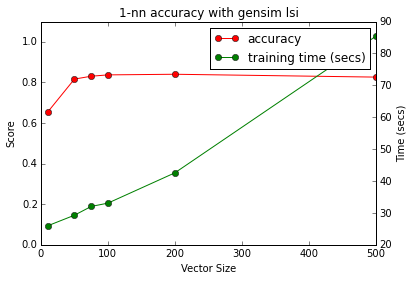

In [12]:
score(ds,"gensim_lsi")

In [13]:
# Run Sklearn NMF test

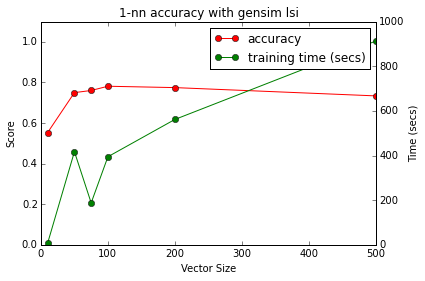

In [14]:
score(ds,"sklearn_nmf")